## Decision Tree Classification

## Importing Libraries

In [14]:
import pandas as pd 
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

In [17]:
df = pd.read_csv("C:\\Users\\durgesh\\Downloads\\data.csv")
df

,Quantity,Age,Gender,Height (cm),Weight (kg),BMI,Dosage Count Last 5 Years,Survive,Smoker,Survival Duration
0,1,38,Female,161,60.6,23.378728,29,1,0,13079
1,7,43,Male,162,59.0,22.481329,28,1,0,15401
2,9,36,Male,163,53.4,20.098611,39,1,0,11458
3,3,47,Female,155,65.7,27.346514,34,1,0,16210
4,1,32,Female,160,57.2,22.343750,71,1,1,10139
...,...,...,...,...,...,...,...,...,...,...
93,5,46,Female,163,56.1,21.114833,56,1,0,16583
94,3,47,Female,155,64.8,26.971904,25,1,0,17016
95,9,43,Male,161,59.5,22.954361,43,1,0,14265
96,1,42,Female,159,55.1,21.795024,37,1,1,14954


In [36]:
x = df.drop('Survive',axis=1)
y = df['Survive'] 


In [40]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'gender_column' is the column with categorical data
label_encoder = LabelEncoder()
x['Gender'] = label_encoder.fit_transform(x['Gender'])


In [41]:
X = pd.get_dummies(x, columns=['Gender'])


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Quantity                   98 non-null     int64  
 1   Age                        98 non-null     int64  
 2   Gender                     98 non-null     object 
 3   Height (cm)                98 non-null     int64  
 4   Weight (kg)                98 non-null     float64
 5   BMI                        98 non-null     float64
 6   Dosage Count Last 5 Years  98 non-null     int64  
 7   Survive                    98 non-null     int64  
 8   Smoker                     98 non-null     int64  
 9   Survival Duration          98 non-null     int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 7.8+ KB


In [28]:
# df1=pd.read_csv("C:\\Users\\durgesh\\Downloads\\heart_train_4c20c6.csv")
# df1

In [21]:
# df2=pd.read_csv("C:\\Users\\durgesh\\Downloads\\heart_test_4c20c6.csv")
# df2

In [22]:
# x_train = df1.drop(['target','Row_id'], axis=1)
# y_train = df1['target']

In [23]:
# x_test=df2.drop(['target','Row_id'], axis=1)
# y_test = df2['target']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=1)

In [45]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
with open('dtc.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris


# Assuming X_train and y_train are your training features and labels
# Create and fit a RandomForestClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Get feature importances
importances = df.columns

# Sort them in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

# You can use these indices to map back to the column names in your dataset.


Feature ranking:
1. feature 3 (trestbps)
2. feature 7 (thalach)
3. feature 12 (thal)
4. feature 13 (target)
5. feature 10 (slope)
6. feature 1 (sex)
7. feature 6 (restecg)
8. feature 9 (oldpeak)
9. feature 5 (fbs)
10. feature 8 (exang)
11. feature 2 (cp)
12. feature 4 (chol)
13. feature 11 (ca)


In [13]:
with open('dtc.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

NameError: name 'dt_model' is not defined

In [12]:
# Testing data evaluation
y_pred = dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print('Classification Report', clf_report)

acc = accuracy_score(y_test,y_pred)
print('Accuracy Score: ', acc)

Confusion Matrix: 
 [[27  2]
 [11 21]]
Classification Report               precision    recall  f1-score   support

           0       0.71      0.93      0.81        29
           1       0.91      0.66      0.76        32

    accuracy                           0.79        61
   macro avg       0.81      0.79      0.78        61
weighted avg       0.82      0.79      0.78        61

Accuracy Score:  0.7868852459016393


In [7]:
# Training data evaluation
y_pred_train = dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cnf_matrix)

clf_report = classification_report(y_train,y_pred_train)
print('Classification Report', clf_report)

acc = accuracy_score(y_train,y_pred_train)
print('Accuracy Score: ', acc)

Confusion Matrix: 
 [[108   0]
 [  0 134]]
Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       134

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242

Accuracy Score:  1.0


## Plotting

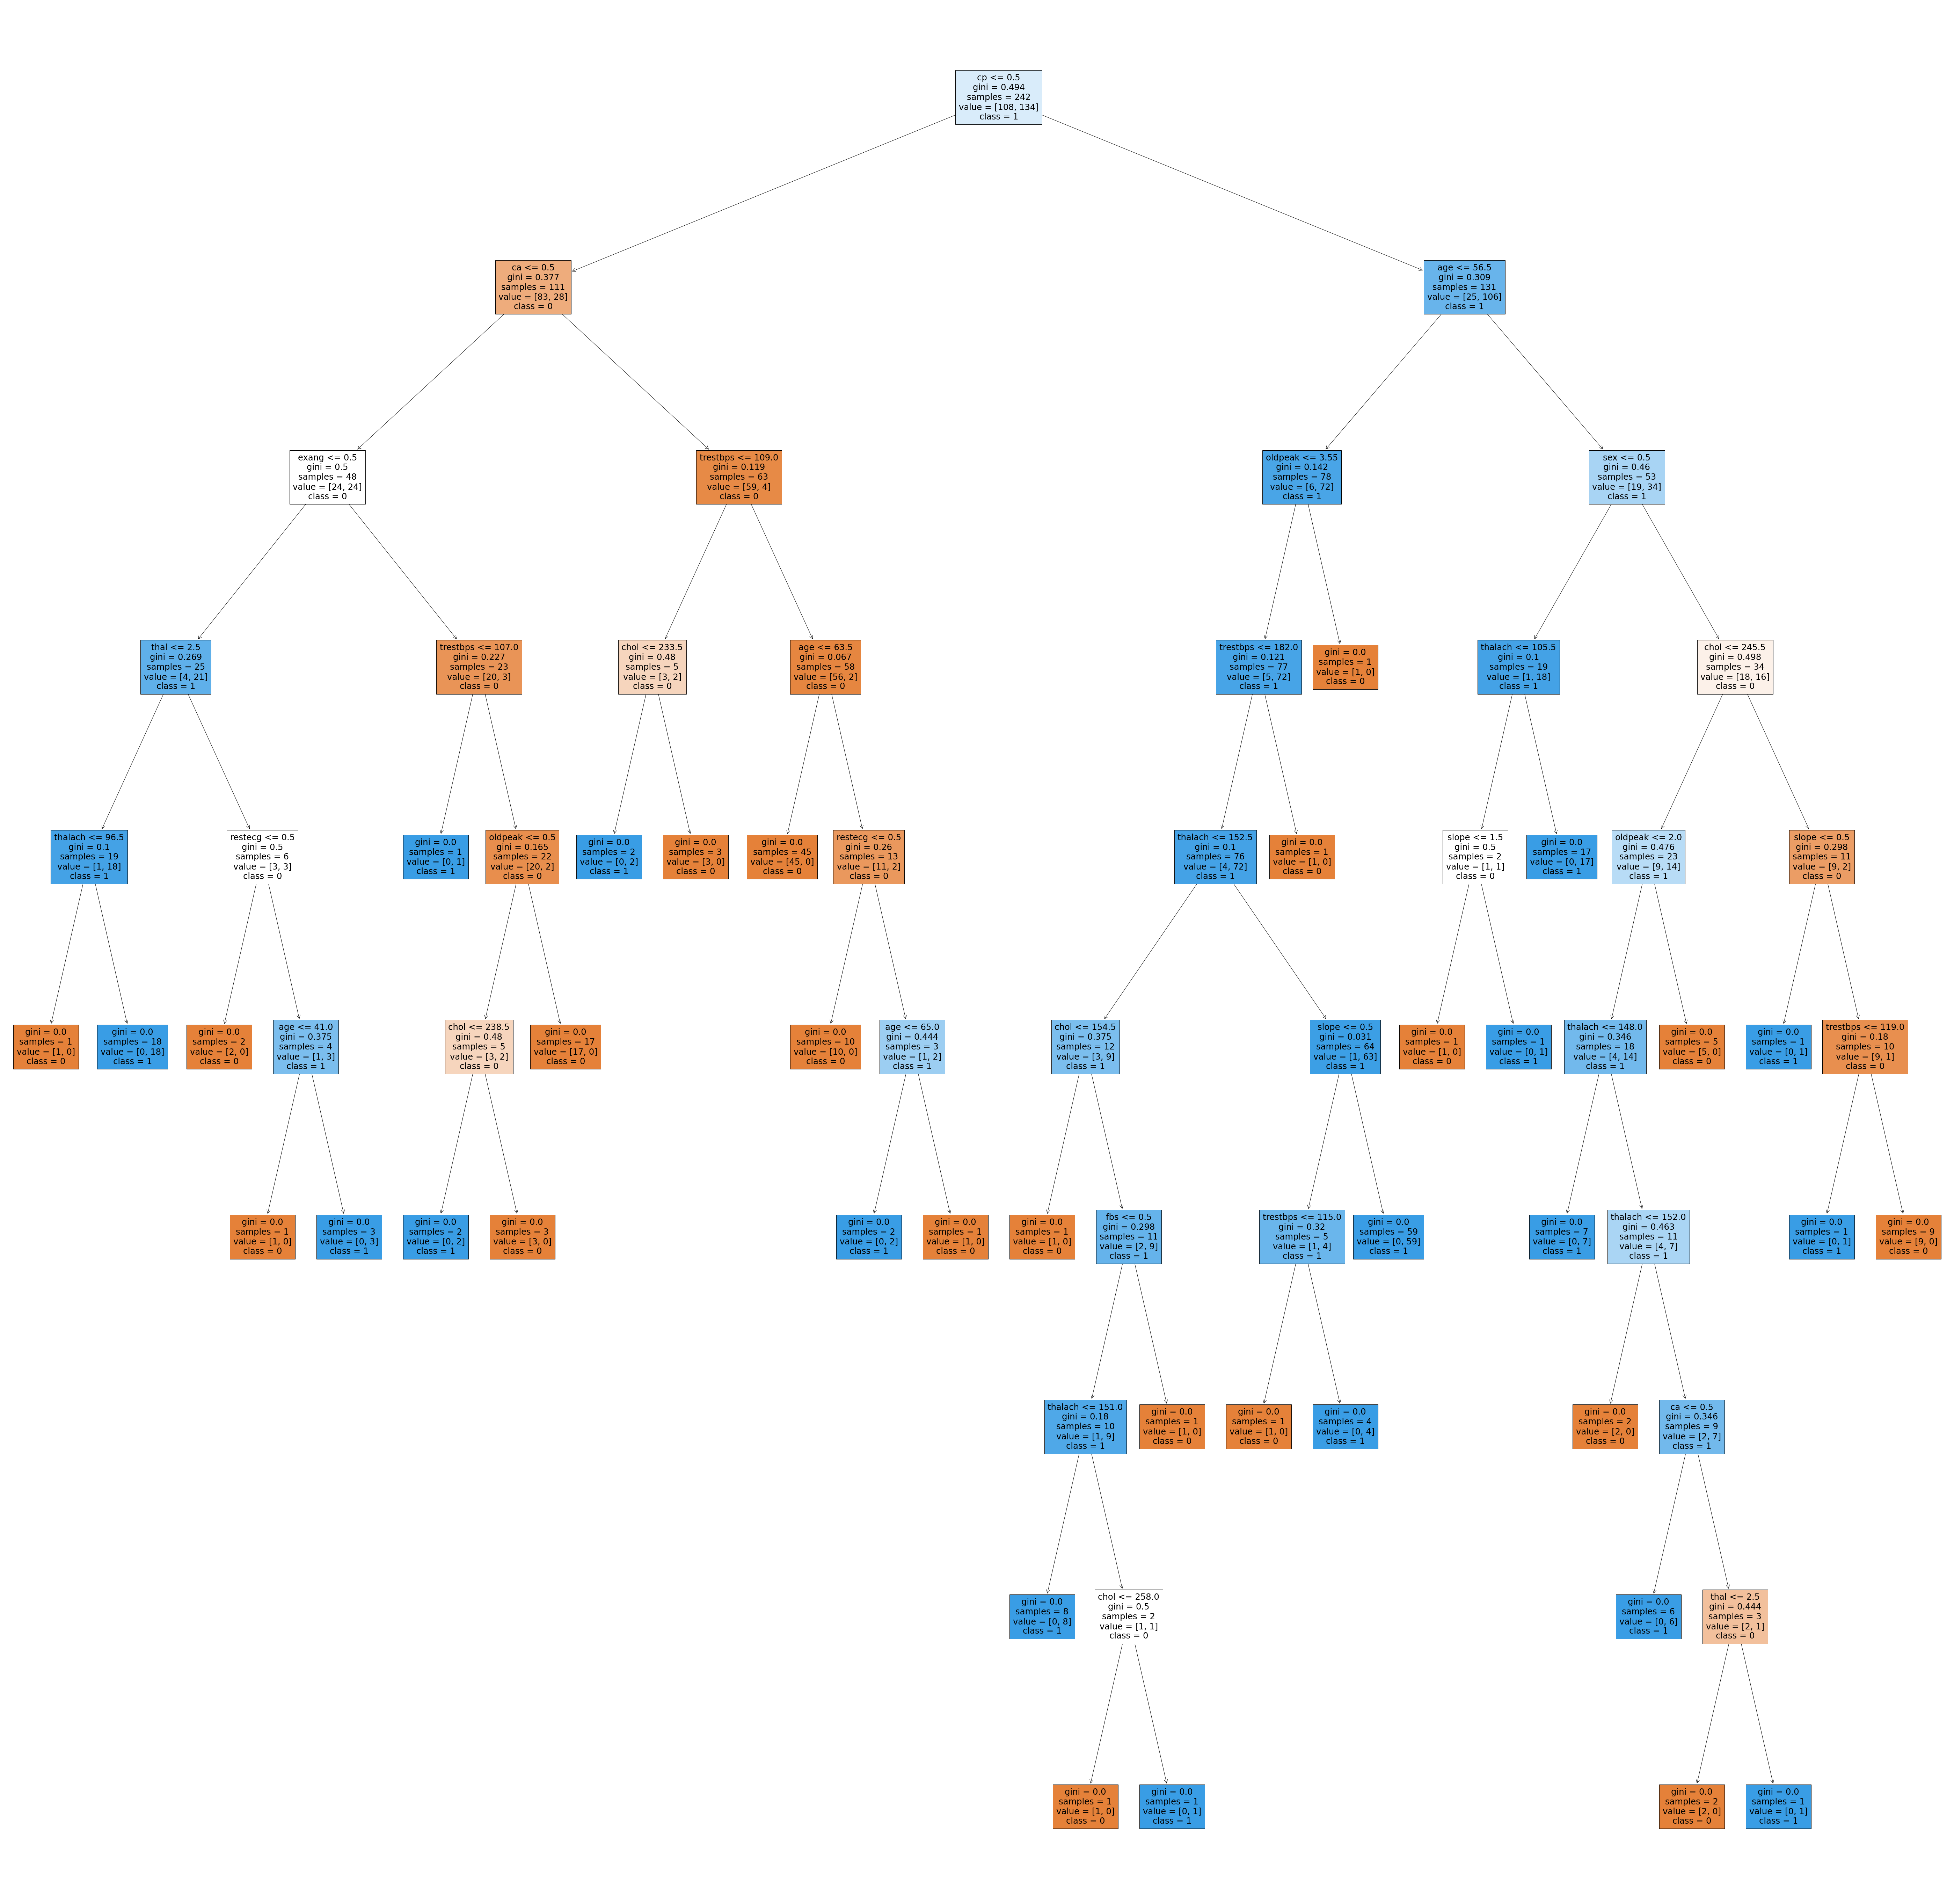

In [9]:
plt.figure(figsize=(100,100))
tree = plot_tree(dt_model, feature_names=x.columns, class_names=['0','1'], filled=True)
plt.savefig('DT_classification.png')

## Hyperparameter Tunning

In [22]:
dt_model = DecisionTreeClassifier()

hyp = {'criterion':['entropy'],
       'max_depth': np.arange(8,9),
       'min_samples_split':np.arange(3,4),
       'max_leaf_nodes':np.arange(2,14)} 

gscv_dt_model = GridSearchCV(dt_model,hyp,cv=5)
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': array([8]),
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
                         'min_samples_split': array([3])})

In [23]:
gscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=13,
                       min_samples_split=3)

In [25]:
# Testing data evaluation
y_pred = gscv_dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cnf_matrix)

clf_report = classification_report(y_test,y_pred)
print('Classification Report', clf_report)

acc = accuracy_score(y_test,y_pred)
print('Accuracy Score: ', acc)

Confusion Matrix: 
 [[25  4]
 [ 3 29]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Accuracy Score:  0.8852459016393442


In [24]:
y_pred_train = gscv_dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cnf_matrix)

clf_report = classification_report(y_train,y_pred_train)
print('Classification Report', clf_report)

acc = accuracy_score(y_train,y_pred_train)
print('Accuracy Score: ', acc)

Confusion Matrix: 
 [[ 82  27]
 [  7 126]]
Classification Report               precision    recall  f1-score   support

           0       0.92      0.75      0.83       109
           1       0.82      0.95      0.88       133

    accuracy                           0.86       242
   macro avg       0.87      0.85      0.85       242
weighted avg       0.87      0.86      0.86       242

Accuracy Score:  0.859504132231405


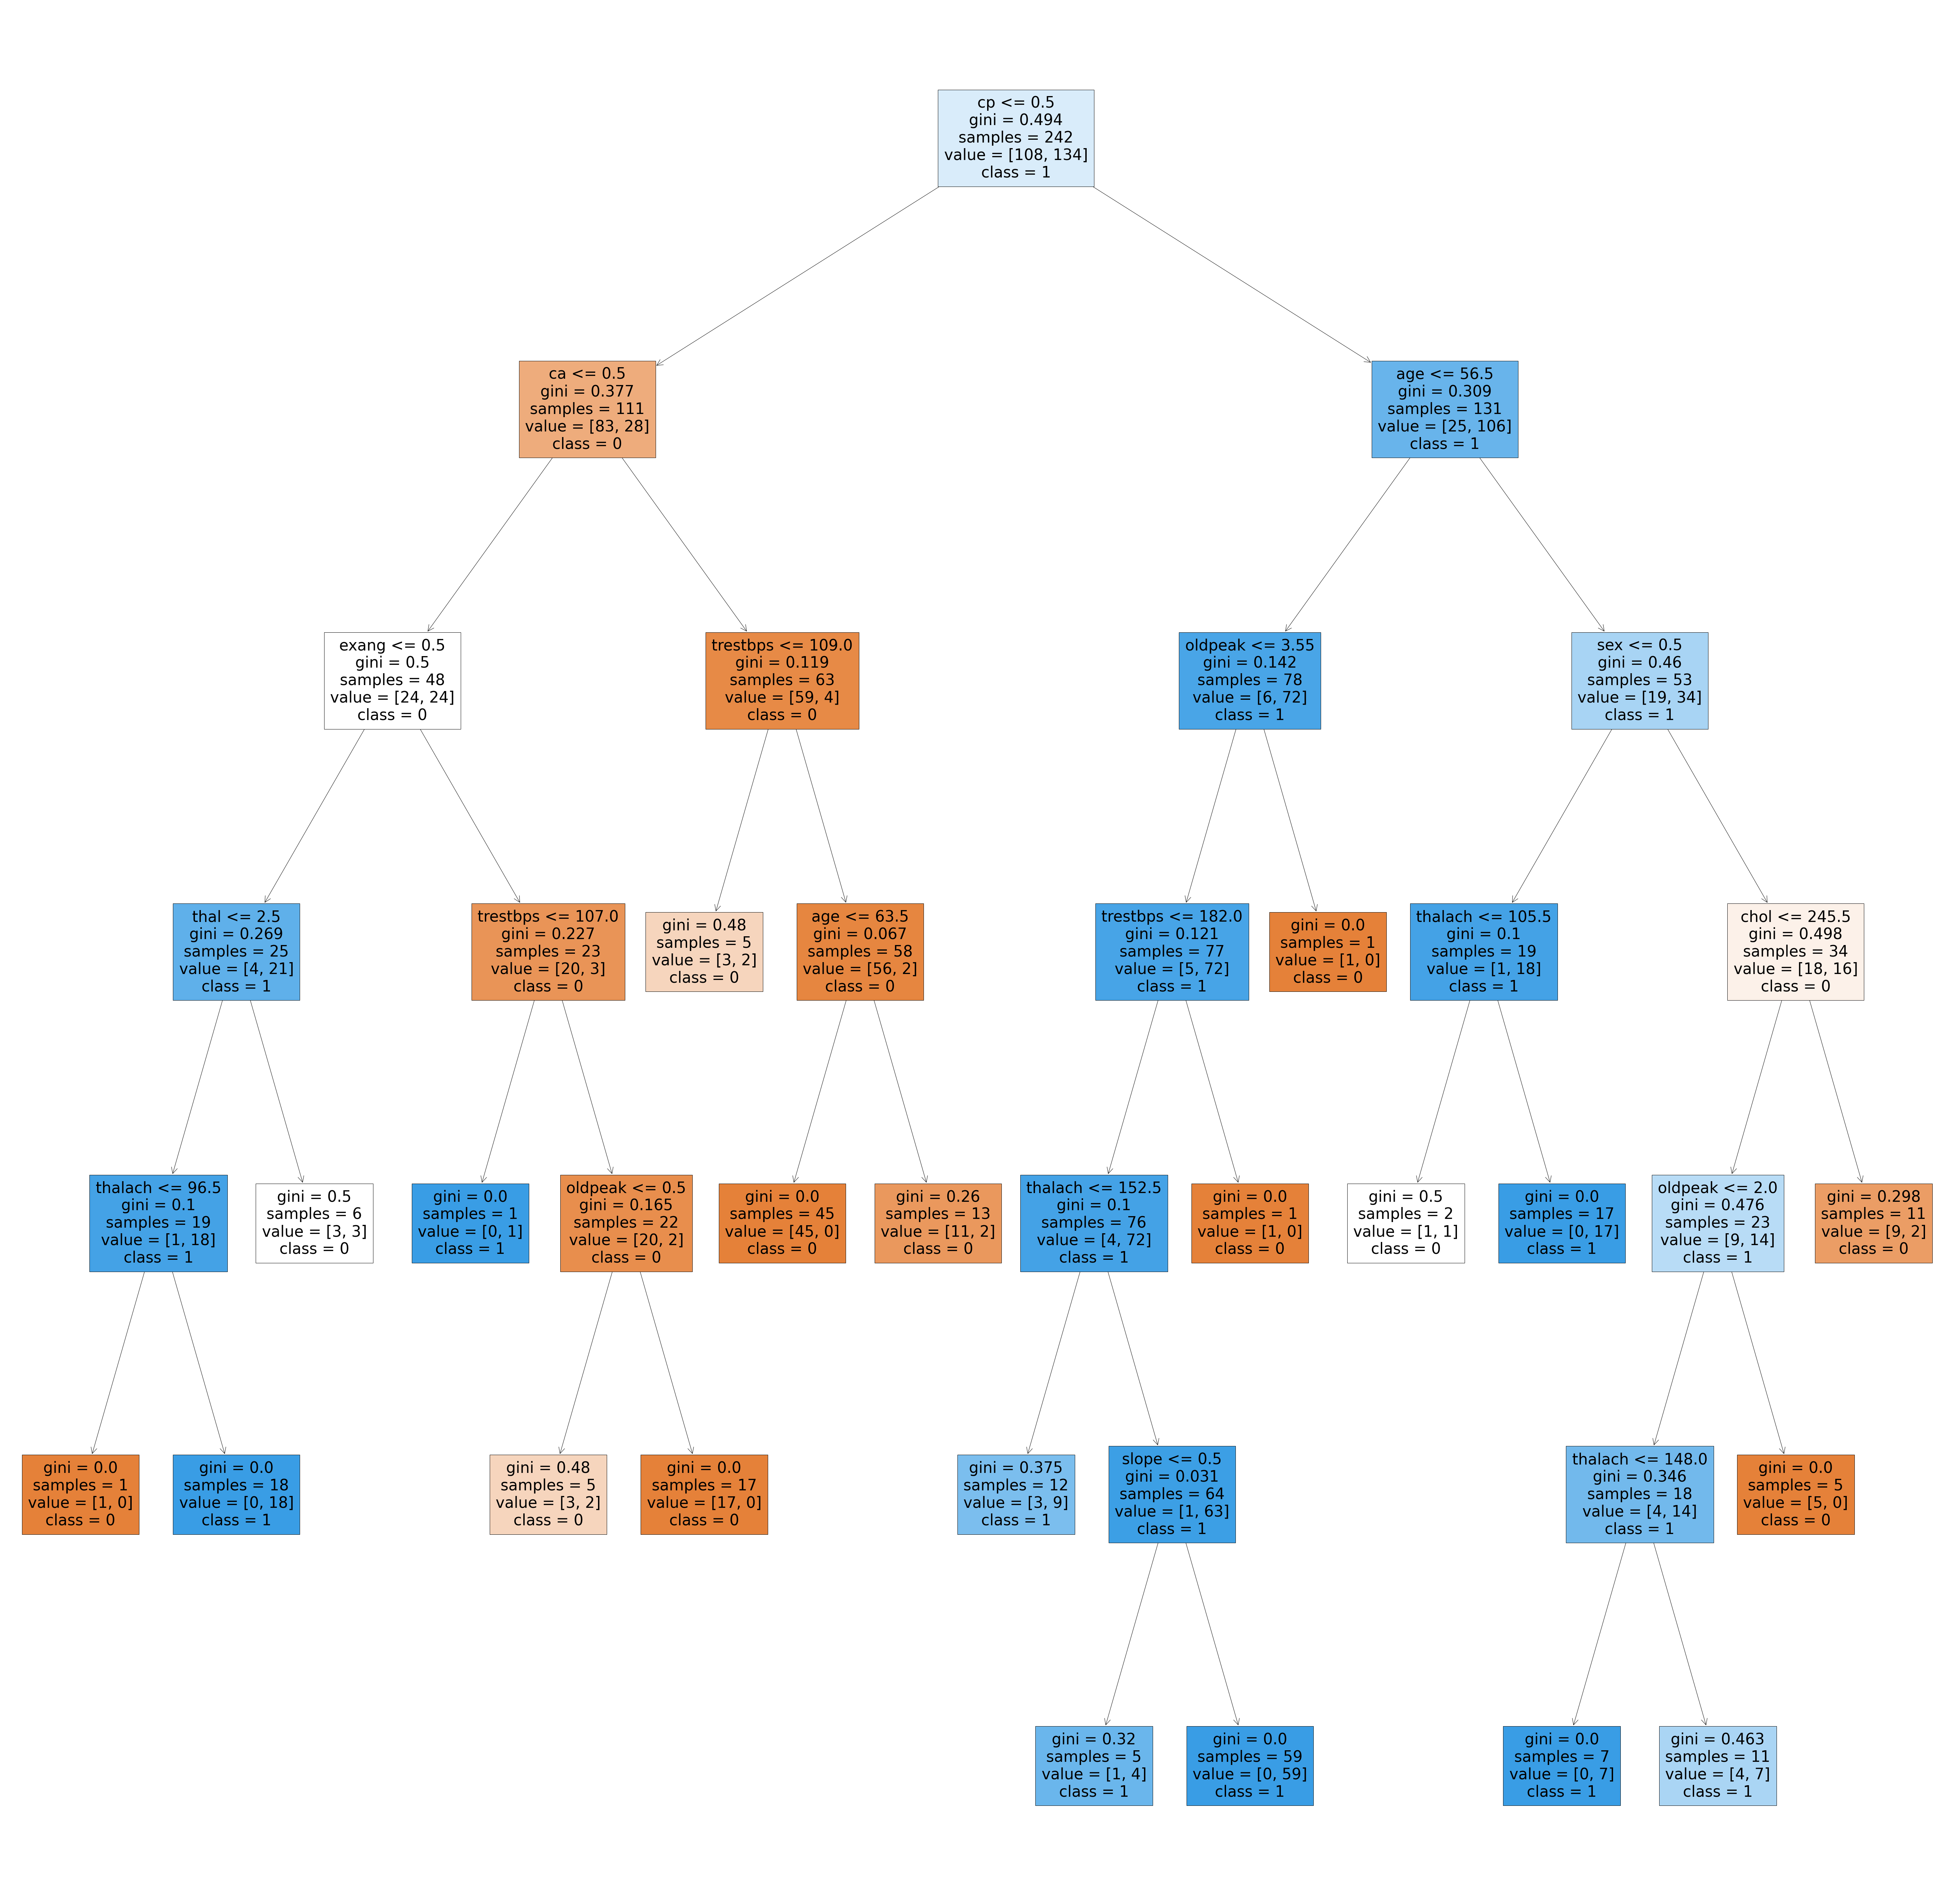

In [17]:
plt.figure(figsize=(100,100))
tree = plot_tree(gscv_dt_model.best_estimator_, feature_names=x.columns, class_names=['0','1'], filled=True )